## Geometry Analysis

Visualizes geometric properties of learned representations across different training objectives.

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load analysis results
with open('../analysis/results/intrinsic_dimension/intrinsic_dimension.json') as f:
    intrinsic = json.load(f)

with open('../analysis/results/neighborhood_stability/neighborhood_overlap.json') as f:
    neighborhood = json.load(f)

with open('../analysis/results/class_geometry/class_geometry.json') as f:
    class_geom = json.load(f)

#### Intrinsic Dimension

Measures effective dimensionality using Participation Ratio (PR).

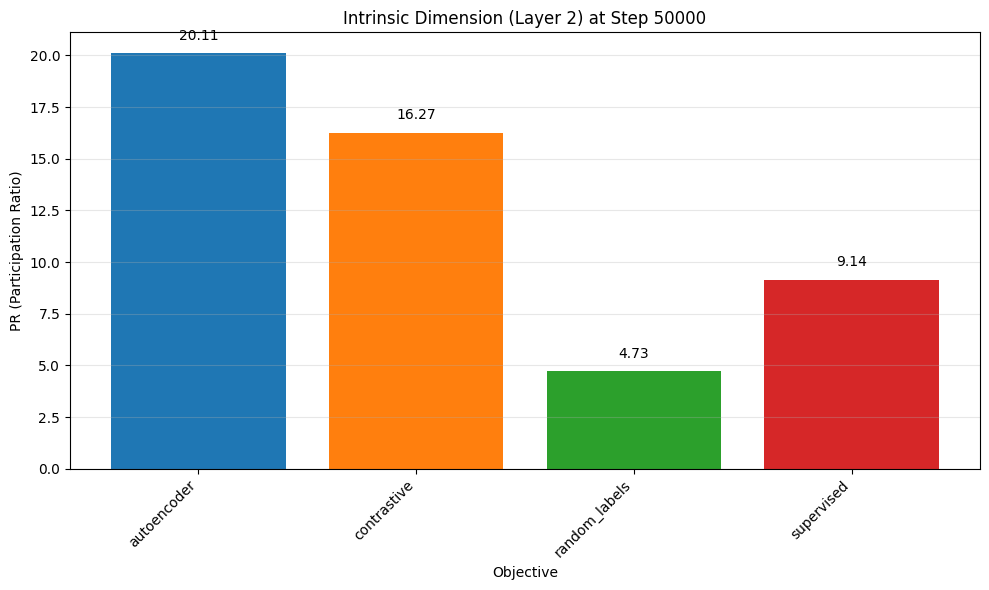

In [17]:
# Extract data for all objectives
objectives = []
dims = []

for objective, data in intrinsic.items():
    if 'step_50000' in data:
        objectives.append(objective)
        dims.append(data['step_50000']['layer_2'])

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(objectives, dims, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Intrinsic Dimension (Layer 2) at Step 50000")
plt.ylabel("PR (Participation Ratio)")
plt.xlabel("Objective")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for bar, dim in zip(bars, dims):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{dim:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Neighborhood Stability

Measures stability of local neighborhood structure. Higher values = more stable.


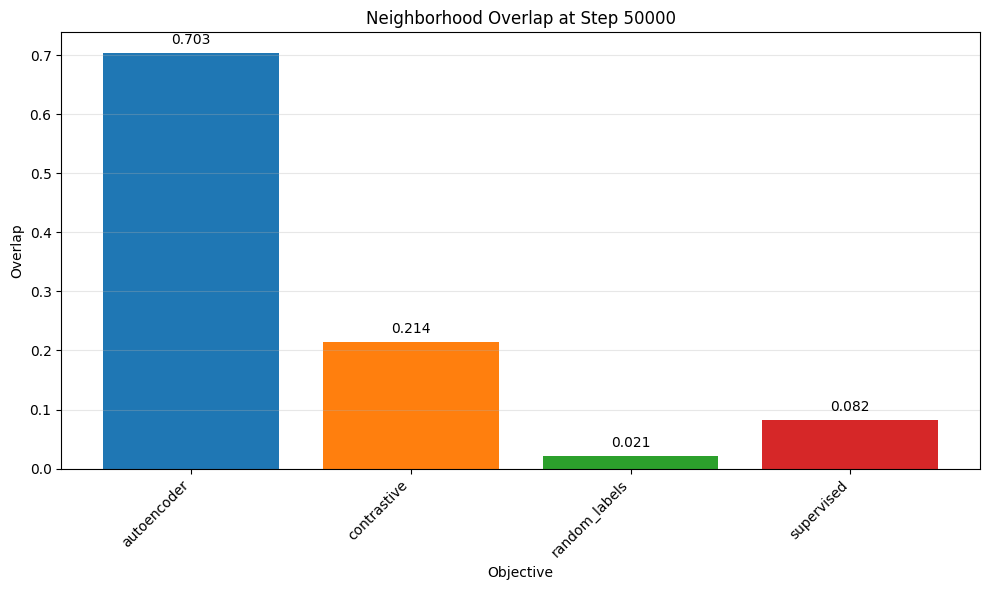

In [18]:
# Extract data for all objectives
objectives = []
overlaps = []

for objective, data in neighborhood.items():
    if 'step_50000' in data:
        objectives.append(objective)
        overlaps.append(data['step_50000'])

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(objectives, overlaps, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Neighborhood Overlap at Step 50000")
plt.ylabel("Overlap")
plt.xlabel("Objective")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for bar, overlap in zip(bars, overlaps):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{overlap:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
